In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, RandomFlip, RandomRotation, Resizing, Rescaling, BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/uc_merced_land_use'

In [4]:
BATCH_SIZE = 56
IMG_W = 256
IMG_H = 256
EPOCH = 40
CHANNEL = 3

INPUT_SHAPE = [BATCH_SIZE, IMG_W, IMG_H, CHANNEL]

In [5]:
train_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/train')
val_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/validation')
test_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/test')

Found 7360 files belonging to 21 classes.
Found 2107 files belonging to 21 classes.
Found 1050 files belonging to 21 classes.


In [6]:
for batch_image, batch_label in train_data.take(1):
    print("Image batch shape:", batch_image.shape)
    print("Label batch shape:", batch_label.shape)
    break

print("Train data batches:", len(train_data))
print("Validation data batches:", len(val_data))
print("Test data batches:", len(test_data))

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
Train data batches: 230
Validation data batches: 66
Test data batches: 33


In [7]:
classes = train_data.class_names
n_classes = len(classes)
classes
#n_classes

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

In [8]:
for batch_image, batch_label in train_data.take(1):
    plt.figure(figsize=(16, 16))
    for i in range(16):
        img = batch_image[i].numpy().astype("uint8")
        lbl = classes[batch_label[i].numpy()]
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(img)
        plt.title(lbl)
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [9]:
augmentation = Sequential([
    Resizing(IMG_W, IMG_H),
    Rescaling(1.0/255),
    RandomFlip(mode="horizontal_and_vertical"),
    RandomRotation(0.1),
])

In [10]:
# from tensorflow.keras.layers import Dropout


In [16]:
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2


model = keras.models.Sequential([
    augmentation,

    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(n_classes, activation='softmax')


    # # Dense(64, activation='relu'),
    # # Dropout(0.5),  # Adding dropout

    # # Dense(64, activation='relu'),  # Additional dense layer
    # # Dropout(0.5),

    # Dense(64, activation='relu'),  # Increased neurons in dense layer
    # Dropout(0.5),  # Dropout to prevent overfitting

    # Dense(64, activation='relu'),  # Another dense layer
    # Dropout(0.5),

    # Dense(n_classes, activation='softmax')
])

model.build(input_shape=INPUT_SHAPE)


In [17]:
model.compile(
optimizer= 'adam',
loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics= ['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss for stopping criteria
    patience=5,            # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model to best epoch weights
)

In [ ]:
history = model.fit(train_data, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1, validation_data=val_data)


Epoch 1/40
230/230 [==============================] - 171s 729ms/step - loss: 4.0833 - accuracy: 0.0698 - val_loss: 3.0260 - val_accuracy: 0.0717
Epoch 2/40
230/230 [==============================] - 165s 716ms/step - loss: 3.1207 - accuracy: 0.0917 - val_loss: 2.8340 - val_accuracy: 0.1566
Epoch 3/40
230/230 [==============================] - 165s 717ms/step - loss: 2.9382 - accuracy: 0.1401 - val_loss: 2.6973 - val_accuracy: 0.1618
Epoch 4/40
230/230 [==============================] - 165s 716ms/step - loss: 2.7000 - accuracy: 0.1967 - val_loss: 2.4912 - val_accuracy: 0.2406
Epoch 5/40
230/230 [==============================] - 166s 718ms/step - loss: 2.4740 - accuracy: 0.2446 - val_loss: 2.1731 - val_accuracy: 0.3299
Epoch 6/40
230/230 [==============================] - 165s 716ms/step - loss: 2.2775 - accuracy: 0.2905 - val_loss: 1.9048 - val_accuracy: 0.4082
Epoch 7/40
230/230 [==============================] - 164s 711ms/step - loss: 2.1396 - accuracy: 0.3200 - val_loss: 1.9841 -

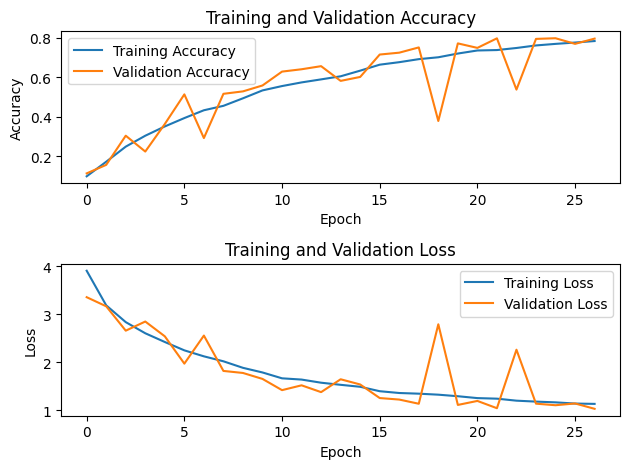

In [ ]:
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# The original decode_labels function is not needed since labels are already class indices
# def decode_labels(labels):
#     return np.argmax(labels, axis = 1)

true_labels = []
all_pred_classes = []

for images, labels in test_data:
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1) # Decode predictions

    true_labels.extend(labels.numpy()) # Convert labels to numpy array if necessary
    all_pred_classes.extend(pred_classes)

1/1 [==============================] - 0s 266ms/step


In [ ]:
report = classification_report(true_labels, all_pred_classes, target_names = classes)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.94      0.96      0.95        50
         airplane       0.91      0.84      0.88        50
  baseballdiamond       0.89      0.64      0.74        50
            beach       0.89      0.94      0.91        50
        buildings       0.49      0.92      0.64        50
        chaparral       1.00      0.84      0.91        50
 denseresidential       0.53      0.70      0.60        50
           forest       0.81      1.00      0.89        50
          freeway       0.82      0.90      0.86        50
       golfcourse       0.71      0.78      0.74        50
           harbor       0.98      0.94      0.96        50
     intersection       0.79      0.74      0.76        50
mediumresidential       0.71      0.30      0.42        50
   mobilehomepark       0.87      0.80      0.83        50
         overpass       0.72      0.88      0.79        50
       parkinglot       1.00    

In [ ]:
def decode_labels(labels):
     return np.argmax(labels, axis = 1)


1/1 [==============================] - 0s 167ms/step


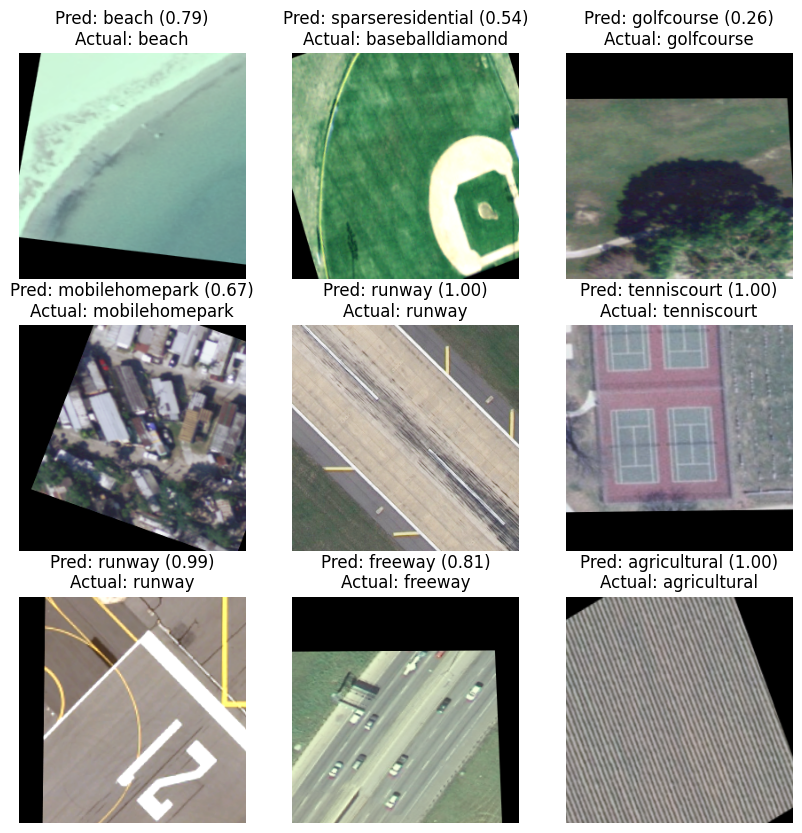

In [ ]:
# Ensure consistent decoding for predictions and true labels
for images, labels in test_data.take(1):
    predictions = model.predict(images)
    pred_classes = decode_labels(predictions)  # Decode predicted labels

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class = classes[pred_classes[i]]  # Correct predicted class name
        true_class = classes[labels[i].numpy()]  # Correct actual class name
        prob = np.max(predictions[i])  # Prediction confidence

        plt.title(f"Pred: {pred_class} ({prob:.2f})\nActual: {true_class}")
        plt.axis("off")
    plt.show()


In [ ]:
from tensorflow.keras.models import save_model

# Save the model as a .h5 file
model.save('my_model.h5')

# Download the model file to your local device
from google.colab import files
files.download('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>